<a href="https://colab.research.google.com/github/luiseduardoballarati/MSc-CS-Dissertation/blob/main/Network_Generator_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Network Generator - imports

In [ ]:
import pandas as pd
import time
import ast
import io
import numpy as np
import heapq
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import re
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
dfb =  pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Bath/Dissertation/The Guardian Datasets/svo_pickles/business_svo_combined.pkl')
dfp =  pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Bath/Dissertation/The Guardian Datasets/svo_pickles/politics_svo_combined.pkl')
dfs =  pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Bath/Dissertation/The Guardian Datasets/svo_pickles/science_svo_combined.pkl')
dft =  pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Bath/Dissertation/The Guardian Datasets/svo_pickles/tech_svo_combined.pkl')
dfw =  pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Bath/Dissertation/The Guardian Datasets/svo_pickles/world_svo_combined.pkl')
dfc =  pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Bath/Dissertation/The Guardian Datasets/svo_pickles/culture_svo_combined.pkl')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.concat([dfb, dfp, dfs, dft, dfw, dfc])
print(df.shape)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1317048, 3)


,sectionName,webPublicationDate,svo
0,Business,2022-01-31 22:25:24+00:00,"[(stock market, closed hit, shares ), (turbule..."
1,Business,2022-01-31 19:35:49+00:00,"[(vodafone, came ago remarkably, ), (daring ac..."
2,Business,2022-01-31 19:24:56+00:00,"[(tesco, closing launched, jack shoppers chain..."
3,Technology,2022-01-31 19:18:10+00:00,"[(sony, agreed buy, bungie maker latest ), (wa..."
4,Politics,2022-01-31 18:53:47+00:00,"[(demands, accept blamed, ), (long queues, cau..."


In [ ]:
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
Index: 1317048 entries, 0 to 319717
Data columns (total 3 columns):
 #   Column              Non-Null Count    Dtype              
---  ------              --------------    -----              
 0   sectionName         1317048 non-null  object             
 1   webPublicationDate  1317048 non-null  datetime64[ns, UTC]
 2   svo                 1317048 non-null  object             
dtypes: datetime64[ns, UTC](1), object(2)
memory usage: 40.2+ MB


# Testing whole dataset

In [ ]:
all_triplets_dfb = [triplet for sublist in dfb['svo'] for triplet in sublist]
all_triplets_dfp = [triplet for sublist in dfp['svo'] for triplet in sublist]
all_triplets_dfs = [triplet for sublist in dfs['svo'] for triplet in sublist]
all_triplets_dft = [triplet for sublist in dft['svo'] for triplet in sublist]
all_triplets_dfw = [triplet for sublist in dfw['svo'] for triplet in sublist]
all_triplets_dfc = [triplet for sublist in dfc['svo'] for triplet in sublist]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def filtered_df_creator(triplets, word=None):
  transactions = []
  for i, triple in enumerate(triplets):
    temp_list = ''
    if word is None or word in triple:
      temp_list += triple[0] + ', '
      temp_list += triple[1] + ', '
      temp_list += triple[2][:-1]
      transactions.append({'row_number': i, 'triple': temp_list.replace(',', '').split()})

  filtered_df = pd.DataFrame(transactions)
  return filtered_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfb_f = filtered_df_creator(all_triplets_dfb)
dfp_f = filtered_df_creator(all_triplets_dfp)
dfs_f = filtered_df_creator(all_triplets_dfs)
dft_f = filtered_df_creator(all_triplets_dft)
dfw_f = filtered_df_creator(all_triplets_dfw)
dfc_f = filtered_df_creator(all_triplets_dfc)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dftest = pd.concat([dfb_f, dfp_f, dfs_f, dft_f, dfw_f, dfc_f])
print(dftest.shape)
dftest.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(59558455, 2)


,row_number,triple
0,0,"[stock, market, closed, hit, shares]"
1,1,"[turbulent, month, worries]"
2,2,"[rises, ukraine]"
3,3,"[s&amp;p, 500, jumped, 500, led]"
4,4,"[s&amp;p, leaves, 500, worst]"


In [ ]:
# Convert to CSV
dftest.to_csv('datasetsimpletriplets.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('datasetsimpletriplets.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
central_node = "brexit"

transactions = dftest['triple'].tolist()

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

filtered_rules = rules[(rules['antecedents'].apply(lambda x: central_node in x) |
                            rules['consequents'].apply(lambda x: central_node in x))]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges from filtered association rules
for _, row in filtered_rules.iterrows():
    if central_node in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(central_node, consequent, weight=row['confidence'])
    elif central_node in row['consequents']:
        for antecedent in row['antecedents']:
            G.add_edge(antecedent, central_node, weight=row['confidence'])

# Plot the graph
plt.figure(figsize=(16, 12))
pos = nx.spring_layout(G)
edges = G.edges(data=True)
weights = [edge[2]['weight'] * 1 for edge in edges]

nx.draw(G, pos, with_labels=True, node_size=750, node_color="lightblue", font_size=5, font_weight="bold", width=weights)

# Draw edge labels (confidence levels)
edge_labels = {(edge[0], edge[1]): f"{edge[2]['weight']:.2f}" for edge in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)

plt.title(f"SVO Association Network for '{central_node}'")
plt.show()

# Net

In [ ]:
all_triplets = [triplet for sublist in df['svo'] for triplet in sublist]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(all_triplets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


59558455

In [ ]:
all_triplets[0:2]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('stock market', 'closed hit', 'shares '), ('turbulent month', 'worries', '')]

In [ ]:
l = []
for item in all_triplets:
  if 'brexit' in item:
    l.append(item)
len(l)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


8884

In [ ]:
def filtered_df_creator(triplets, word=None):
  transactions = []
  for i, triple in enumerate(triplets):
    temp_list = ''
    if word is None or word in triple:
      temp_list += triple[0] + ', '
      temp_list += triple[1] + ', '
      temp_list += triple[2][:-1]
      transactions.append({'row_number': i, 'triple': temp_list.replace(',', '').split()})

  filtered_df = pd.DataFrame(transactions)
  return filtered_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def filtered_df_creator_2(triplets, word=None):
  transactions = []
  for i, triple in enumerate(triplets):
    temp_list = ''
    verb_list = ''
    obj_list = ''
    if word is None or word in triple:
      temp_list += triple[0] + ', '
      verb_list += triple[1] + ', '
      obj_list += triple[2][:-1]
      transactions.append({'row_number': i, 'triple': temp_list.replace(',', '').split(), 'verb': verb_list.replace(',', '').split(), 'obj': obj_list.replace(',', '').split()}  )

  filtered_df = pd.DataFrame(transactions)
  return filtered_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
filtered_df = filtered_df_creator(all_triplets, 'brexit')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
filtered_df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(8884, 2)

In [ ]:
filtered_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,row_number,triple
0,1235,"[brexit, deepened, crisis]"
1,8410,"[brexit, getting, worse]"
2,20887,"[brexit, added, caused, unnecessary, difficult..."
3,26138,"[brexit, based]"
4,26479,"[brexit, created, expect, issue, return]"
...,...,...
8879,59483896,"[brexit, means, art]"
8880,59523118,"[brexit, got, map, nasty]"
8881,59532155,"[brexit, says, telling, people]"
8882,59544136,"[brexit, says, started, adding, issues]"


In [ ]:
filtered_df2 = filtered_df_creator_2(all_triplets, 'brexit')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(filtered_df2.shape)
filtered_df2.head()

(8884, 4)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,row_number,triple,verb,obj
0,1235,[brexit],[deepened],[crisis]
1,8410,[brexit],"[getting, worse]",[]
2,20887,[brexit],"[added, caused]","[unnecessary, difficulties]"
3,26138,[brexit],[based],[]
4,26479,[brexit],"[created, expect]","[issue, return]"


In [ ]:
filtered_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,row_number,triple
0,1235,"[brexit, deepened, crisis]"
1,8410,"[brexit, getting, worse]"
2,20887,"[brexit, added, caused, unnecessary, difficult..."
3,26138,"[brexit, based]"
4,26479,"[brexit, created, expect, issue, return]"


In [ ]:
filtered_df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(8884, 2)

In [ ]:
from collections import Counter

# Initialize the directed graph
G = nx.DiGraph()

central_node = 'brexit'
G.add_node(central_node)

# Function to add edges to the graph
def add_edges(central_node, verbs, objects):
    for verb in verbs:
        if objects:
            most_common_object = Counter(objects).most_common(1)[0][0]
            G.add_edge(central_node, verb)
            G.add_edge(verb, most_common_object)
        else:
            G.add_edge(central_node, verb)

# Iterate over the DataFrame and add nodes and edges
for index, row in filtered_df2.iterrows():
    verbs = row['verb']
    objects = row['obj']
    add_edges(central_node, verbs, objects)
"""
# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=2000, font_size=10, font_weight="bold", edge_color='gray')
plt.title(f"SVO Network for '{central_node}'", fontsize=15)
plt.show()
"""

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'\n# Draw the graph\nplt.figure(figsize=(10, 8))\npos = nx.spring_layout(G, seed=42)\nnx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=2000, font_size=10, font_weight="bold", edge_color=\'gray\')\nplt.title(f"SVO Network for \'{central_node}\'", fontsize=15)\nplt.show()\n'

# Metrics

In [ ]:
# In-degree centrality
in_degree_centrality = nx.in_degree_centrality(G)
print("In-degree Centrality:", in_degree_centrality)

# Out-degree centrality
out_degree_centrality = nx.out_degree_centrality(G)
print("Out-degree Centrality:", out_degree_centrality)

In-degree Centrality: {'brexit': 0.0019372336303758234, 'deepened': 0.0003874467260751647, 'crisis': 0.0015497869043006587, 'getting': 0.0003874467260751647, 'worse': 0.0003874467260751647, 'added': 0.0003874467260751647, 'unnecessary': 0.0007748934521503294, 'caused': 0.0003874467260751647, 'based': 0.0003874467260751647, 'created': 0.0003874467260751647, 'issue': 0.0030995738086013174, 'expect': 0.0003874467260751647, 'requires': 0.0003874467260751647, 'fac': 0.0015497869043006587, 'understand': 0.0003874467260751647, 'fears': 0.0027121270825261525, 'fuelling': 0.0003874467260751647, 'remains': 0.0003874467260751647, 'delivered': 0.0003874467260751647, 'played': 0.0003874467260751647, 'highlighted': 0.0003874467260751647, 'having': 0.0003874467260751647, 'ongoing': 0.0003874467260751647, 'imposes': 0.0003874467260751647, 'barriers': 0.0019372336303758234, 'acknowledge': 0.0003874467260751647, 'working': 0.0003874467260751647, 'means': 0.0003874467260751647, 'inflicted': 0.00038744672

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate in-degree centrality
in_degree_centrality = nx.in_degree_centrality(G)

# Sort nodes by in-degree centrality in descending order
sorted_in_degree = sorted(in_degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Print top N nodes with the highest in-degree centrality
top_n = 5
print(f"Top {top_n} nodes by in-degree centrality:")
for node, centrality in sorted_in_degree[:top_n]:
    print(f"Node: {node}, In-degree Centrality: {centrality}")

# Similarly, calculate out-degree centrality
out_degree_centrality = nx.out_degree_centrality(G)

# Sort nodes by out-degree centrality in descending order
sorted_out_degree = sorted(out_degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Print top N nodes with the highest out-degree centrality
print(f"\nTop {top_n} nodes by out-degree centrality:")
for node, centrality in sorted_out_degree[:top_n]:
    print(f"Node: {node}, Out-degree Centrality: {centrality}")


Top 5 nodes by in-degree centrality:
Node: uk, In-degree Centrality: 0.014722975590856257
Node: deal, In-degree Centrality: 0.01394808213870593
Node: economy, In-degree Centrality: 0.011235955056179775
Node: opportunities, In-degree Centrality: 0.008911274699728787
Node: opportunity, In-degree Centrality: 0.008911274699728787

Top 5 nodes by out-degree centrality:
Node: brexit, Out-degree Centrality: 0.6416117783804727
Node: says, Out-degree Centrality: 0.017047655947307245
Node: means, Out-degree Centrality: 0.01162340178225494
Node: affect, Out-degree Centrality: 0.01162340178225494
Node: like, Out-degree Centrality: 0.01084850833010461


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Sort nodes by betweenness centrality in descending order
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Print top 10 nodes with the highest betweenness centrality
top_n = 10
print(f"Top {top_n} nodes by betweenness centrality:")
for node, centrality in sorted_betweenness[:top_n]:
    print(f"Node: {node}, Betweenness Centrality: {centrality:.4f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 10 nodes by betweenness centrality:
Node: brexit, Betweenness Centrality: 0.0015
Node: damage, Betweenness Centrality: 0.0001
Node: deal, Betweenness Centrality: 0.0000
Node: impact, Betweenness Centrality: 0.0000
Node: cost, Betweenness Centrality: 0.0000
Node: warning, Betweenness Centrality: 0.0000
Node: blow, Betweenness Centrality: 0.0000
Node: harm, Betweenness Centrality: 0.0000
Node: like, Betweenness Centrality: 0.0000
Node: lead, Betweenness Centrality: 0.0000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


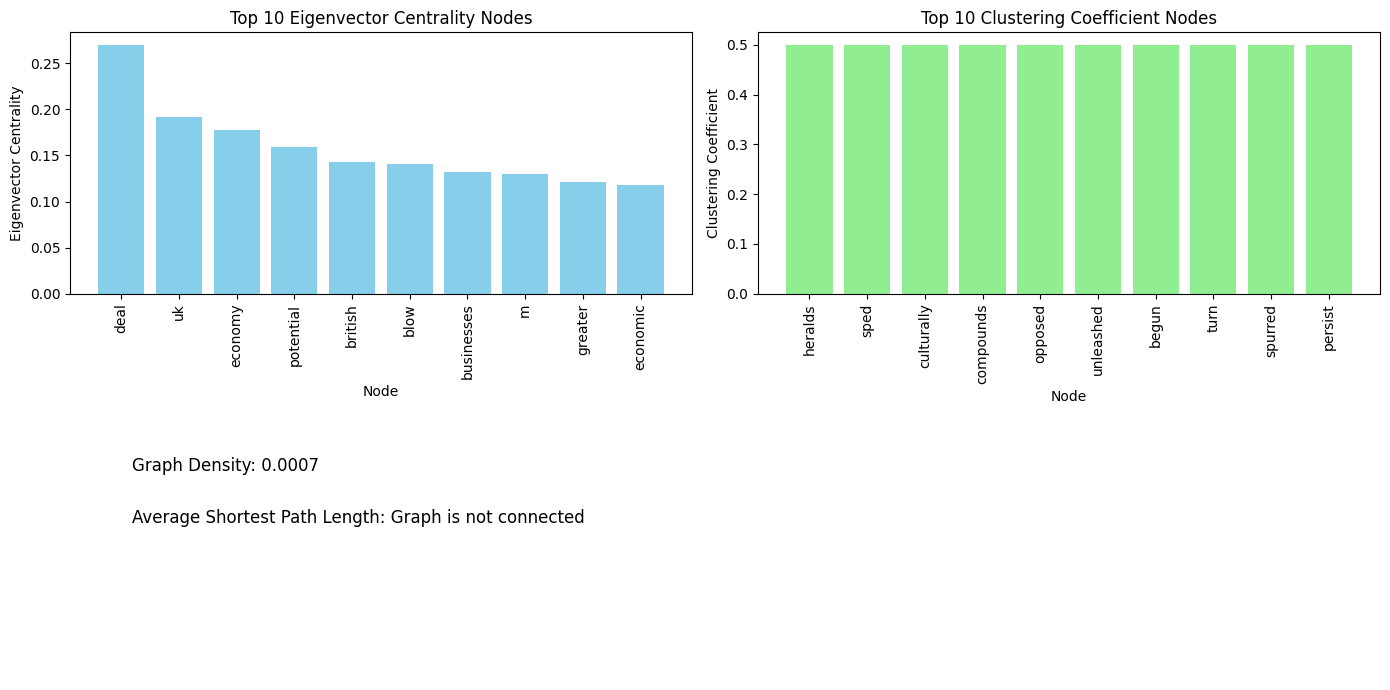

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming G is your graph created previously
# G = nx.DiGraph()

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Calculate density (not for individual nodes, for the whole graph)
density = nx.density(G)

# Calculate average shortest path length for connected graphs only
# For disconnected graphs, consider connected components
try:
    avg_shortest_path_length = nx.average_shortest_path_length(G)
except nx.NetworkXError:
    avg_shortest_path_length = "Graph is not connected"

# Calculate clustering coefficient
clustering_coefficient = nx.clustering(G)

# Extract top 10 nodes based on eigenvector centrality
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract top 10 nodes based on clustering coefficient
top_clustering = sorted(clustering_coefficient.items(), key=lambda x: x[1], reverse=True)[:10]

# Plotting
plt.figure(figsize=(14, 7))

# Plot Eigenvector Centrality
plt.subplot(2, 2, 1)
nodes, centralities = zip(*top_eigenvector)
plt.bar(nodes, centralities, color='skyblue')
plt.title('Top 10 Eigenvector Centrality Nodes')
plt.xlabel('Node')
plt.ylabel('Eigenvector Centrality')
plt.xticks(rotation=90)

# Plot Clustering Coefficient
plt.subplot(2, 2, 2)
nodes, coefficients = zip(*top_clustering)
plt.bar(nodes, coefficients, color='lightgreen')
plt.title('Top 10 Clustering Coefficient Nodes')
plt.xlabel('Node')
plt.ylabel('Clustering Coefficient')
plt.xticks(rotation=90)

# Display general graph metrics
plt.subplot(2, 2, 3)
plt.text(0.1, 0.8, f'Graph Density: {density:.4f}', fontsize=12)
if avg_shortest_path_length != "Graph is not connected":
    plt.text(0.1, 0.6, f'Average Shortest Path Length: {avg_shortest_path_length:.2f}', fontsize=12)
else:
    plt.text(0.1, 0.6, f'Average Shortest Path Length: {avg_shortest_path_length}', fontsize=12)
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import networkx as nx

# Assuming G is your directed graph
# G = nx.DiGraph()
# (Code to add nodes and edges to G)

# In-degree and Out-degree Centrality
in_degree_centrality = nx.in_degree_centrality(G)
out_degree_centrality = nx.out_degree_centrality(G)

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# Eigenvector Centrality
try:
    eigenvector_centrality = nx.eigenvector_centrality(G)
except nx.PowerIterationFailedConvergence as e:
    eigenvector_centrality = None
    print("Eigenvector Centrality calculation failed due to:", e)

# PageRank
pagerank = nx.pagerank(G)

# Density
density = nx.density(G)

# Average Shortest Path Length
if nx.is_strongly_connected(G):
    avg_shortest_path_length = nx.average_shortest_path_length(G)
else:
    avg_shortest_path_length = None

# Clustering Coefficient
clustering_coefficient = nx.clustering(G.to_undirected())

# Network Diameter
if nx.is_strongly_connected(G):
    diameter = nx.diameter(G)
else:
    diameter = None

# Print all metrics
print("In-degree Centrality:", in_degree_centrality)
print("Out-degree Centrality:", out_degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Eigenvector Centrality:", eigenvector_centrality)
print("PageRank:", pagerank)
print("Density:", density)
print("Average Shortest Path Length:", avg_shortest_path_length)
print("Clustering Coefficient:", clustering_coefficient)
print("Network Diameter:", diameter)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In-degree Centrality: {'brexit': 0.0019372336303758234, 'deepened': 0.0003874467260751647, 'crisis': 0.0015497869043006587, 'getting': 0.0003874467260751647, 'worse': 0.0003874467260751647, 'added': 0.0003874467260751647, 'unnecessary': 0.0007748934521503294, 'caused': 0.0003874467260751647, 'based': 0.0003874467260751647, 'created': 0.0003874467260751647, 'issue': 0.0030995738086013174, 'expect': 0.0003874467260751647, 'requires': 0.0003874467260751647, 'fac': 0.0015497869043006587, 'understand': 0.0003874467260751647, 'fears': 0.0027121270825261525, 'fuelling': 0.0003874467260751647, 'remains': 0.0003874467260751647, 'delivered': 0.0003874467260751647, 'played': 0.0003874467260751647, 'highlighted': 0.0003874467260751647, 'having': 0.0003874467260751647, 'ongoing': 0.0003874467260751647, 'imposes': 0.0003874467260751647, 'barriers': 0.0019372336303758234, 'acknowledge': 0.0003874467260751647, 'working': 0.0003874467260751647, 'means': 0.0003874467260751647, 'inflicted': 0.00038744672

# Next

In [ ]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = fpgrowth(df, min_support=0.7, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,1.0,(Kidney Beans)
1,0.8,(Eggs)
2,0.8,"(Kidney Beans, Eggs)"


In [ ]:
"""
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = fpgrowth(df, min_support=0.6, use_colnames=True)

"""

transactions = filtered_df['triple'].tolist()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0.2,10,10000,100bn,10bn,12,16bn,27,29p,31,...,yea,year,yearly,years,yes,yielded,yougov,zero,zombie,£
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8879,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8880,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8881,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8882,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['brexit', 'deepened', 'crisis'],
 ['brexit', 'getting', 'worse'],
 ['brexit', 'added', 'caused', 'unnecessary', 'difficulties'],
 ['brexit', 'based'],
 ['brexit', 'created', 'expect', 'issue', 'return'],
 ['brexit', 'requires', 'fac'],
 ['brexit', 'understand', 'fuelling', 'fears', 'talk', 'attention'],
 ['brexit', 'remains'],
 ['brexit', 'delivered'],
 ['brexit', 'played'],
 ['brexit', 'highlighted'],
 ['brexit', 'having', 'ongoing'],
 ['brexit', 'imposes', 'barriers'],
 ['brexit', 'acknowledge', 'working'],
 ['brexit', 'means'],
 ['brexit', 'working'],
 ['brexit', 'inflicted', 'despite', 'irritatio'],
 ['brexit', 'added', 'new', 'level'],
 ['brexit', 'reduced', 'access'],
 ['brexit', 'created', 'risks'],
 ['brexit', 'created', 'risks'],
 ['brexit', 'having', 'impac'],
 ['brexit', 'changed'],
 ['brexit', 'remains'],
 ['brexit', 'working'],
 ['brexit', 'adding'],
 ['brexit', 'created', 'mountains'],
 ['brexit', 'think', 'good'],
 ['brexit', 'increase', 'economy', 'productivity'],
 ['

In [ ]:
cleaned_data = [[word for word in sublist if word != 'brexit'] for sublist in transactions]

# Display the cleaned list
cleaned_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['deepened', 'crisis'],
 ['getting', 'worse'],
 ['added', 'caused', 'unnecessary', 'difficulties'],
 ['based'],
 ['created', 'expect', 'issue', 'return'],
 ['requires', 'fac'],
 ['understand', 'fuelling', 'fears', 'talk', 'attention'],
 ['remains'],
 ['delivered'],
 ['played'],
 ['highlighted'],
 ['having', 'ongoing'],
 ['imposes', 'barriers'],
 ['acknowledge', 'working'],
 ['means'],
 ['working'],
 ['inflicted', 'despite', 'irritatio'],
 ['added', 'new', 'level'],
 ['reduced', 'access'],
 ['created', 'risks'],
 ['created', 'risks'],
 ['having', 'impac'],
 ['changed'],
 ['remains'],
 ['working'],
 ['adding'],
 ['created', 'mountains'],
 ['think', 'good'],
 ['increase', 'economy', 'productivity'],
 ['thinks', 'reduce', 'uk', 'productivity'],
 ['cut', 'productivity'],
 ['means'],
 ['brought', 'materials', 'huge', 'mountain', 'challenges'],
 ['meant'],
 ['hampered', 'loaded', 'levelled', 'field', 'ability'],
 ['defeating', 'entirely'],
 ['exacerbated', 'impact'],
 ['causing', 'effect'],


In [ ]:
te = TransactionEncoder()
te_ary = te.fit(cleaned_data).transform(cleaned_data)
df_encoded_t = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded_t
fpgrowth(df_encoded_t, min_support=0.01, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.012607,(added)
1,0.013620,(having)
2,0.024651,(means)
3,0.019811,(economy)
4,0.018122,(uk)
5,0.012607,(impact)
6,0.021612,(blame)
7,0.016096,(going)
8,0.011594,(deal)
9,0.010131,(cause)


In [ ]:
fpgrowth(df_encoded, min_support=0.0000000000001, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.999325,(brexit)
1,0.001126,(deepened)
2,0.001126,(crisis)
3,0.001126,(getting)
4,0.001013,(worse)
...,...,...
45115,0.000113,"(map, brexit)"
45116,0.000113,"(map, got, nasty)"
45117,0.000113,"(map, nasty, brexit)"
45118,0.000113,"(map, got, brexit)"


In [ ]:
teste = fpgrowth(df_encoded_t, min_support=0.00000000001, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
teste.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.001126,(deepened)
1,0.001126,(crisis)
2,0.001126,(getting)
3,0.001013,(worse)
4,0.012607,(added)
5,0.009455,(caused)
6,0.001238,(difficulties)
7,0.000788,(unnecessary)
8,0.002026,(based)
9,0.004390,(created)


In [ ]:
# Sorting the DataFrame by 'support' in descending order
df_sorted = teste.sort_values(by='support', ascending=False)

# Selecting the top 20 rows with the highest support value
top_20 = df_sorted.head(20)

top_20

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
30,0.024651,(means)
78,0.021612,(blame)
784,0.020824,(mean)
287,0.020149,(happen)
45,0.019811,(economy)
175,0.018685,(says)
48,0.018122,(uk)
246,0.017560,(lead)
160,0.016209,(happened)
79,0.016096,(going)


In [ ]:
c = 0
for item in cleaned_data:
  if "means" in item:
    c += 1
c

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


219

In [ ]:
len(cleaned_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


8884

In [ ]:
219/len(cleaned_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.02465105808194507

In [ ]:
from sys import platlibdir
def plot(df, central_node, min_support=0.01, i=12, j=10, name="plot.png", return_rules=False):

  transactions = df['triple'].tolist()

  te = TransactionEncoder()
  te_ary = te.fit(transactions).transform(transactions)
  df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

  frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

  rules = association_rules(frequent_itemsets, metric="zhangs_metric", min_threshold=0.5)

  # Create a directed graph
  G = nx.DiGraph()

  # Add nodes and edges from filtered association rules
  for _, row in rules.iterrows():
      if central_node in row['antecedents']:
          for consequent in row['consequents']:
              G.add_edge(central_node, consequent, weight=row["support"])
      elif central_node in row['consequents']:
          for antecedent in row['antecedents']:
              G.add_edge(antecedent, central_node, weight=row["support"])


  # Generate a graph layout
  plt.figure(figsize=(i, j))  # Reduced figure size to better fit on a single page

  # Use the spring layout for better node spacing
  pos = nx.spring_layout(G, k=0.5, iterations=50)

  # Calculate node sizes based on degree (or use a centrality measure)
  node_sizes = [500 + 1000 * nx.degree(G, node) for node in G]

  # defining the edges
  edges = G.edges(data=True)

  # Draw nodes with customized sizes and colors
  nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="skyblue", edgecolors='k')

  # Adjust edge thickness based on weights
  weights = [edge[2]['weight'] for edge in G.edges(data=True)]
  nx.draw_networkx_edges(G, pos, edgelist=edges, width=[weight * 100 for weight in weights], alpha=0.6)

  # Draw labels with adjusted font size for readability
  nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold")

  # Draw edge labels (confidence levels)
  edge_labels = {(edge[0], edge[1]): f"{edge[2]['weight']:.4f}" for edge in edges}
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=6)

  # Add title and remove axis
  plt.title(f"SVO Association Network for '{central_node}'", fontsize=14)
  plt.axis('off')
  plt.savefig(name)

  # Display the graph
  if return_rules:
    return plt, rules, frequent_itemsets, edges
  else:
    return plt
chart, rules, freq_itemsets, edges = plot( filtered_df, "brexit", return_rules=True, min_support=0.01)
chart

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

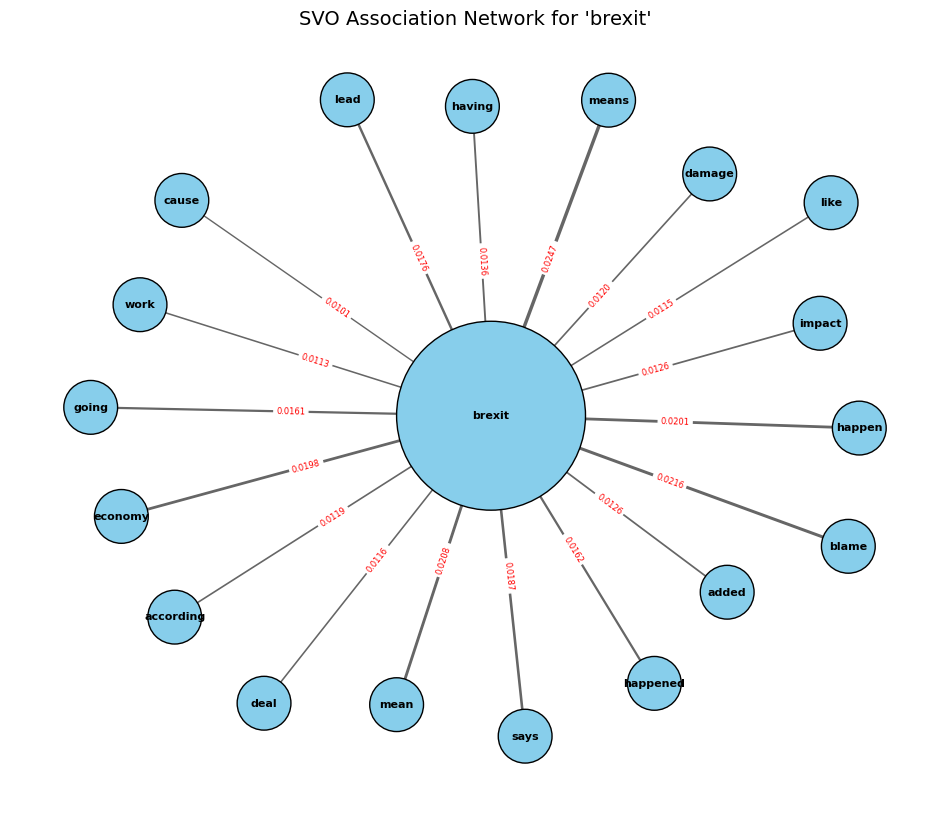

In [ ]:
chart, rules, freq_itemsets, edges = plot( filtered_df, "brexit", return_rules=True, min_support=0.01)
chart

In [ ]:
edges

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OutEdgeDataView([('brexit', 'added', {'weight': 1.0000000000000815}), ('brexit', 'having', {'weight': 0.9999999999999064}), ('brexit', 'means', {'weight': 0.9999999999999848}), ('brexit', 'economy', {'weight': 1.0000000000001186}), ('brexit', 'impact', {'weight': 1.0000000000000815}), ('brexit', 'blame', {'weight': 0.9999999999999457}), ('brexit', 'going', {'weight': 0.999999999999979}), ('brexit', 'deal', {'weight': 1.0000000000000655}), ('brexit', 'cause', {'weight': 1.000000000000009}), ('brexit', 'happened', {'weight': 0.9999999999999457}), ('brexit', 'work', {'weight': 0.9999999999999836}), ('brexit', 'says', {'weight': 0.9999999999998654}), ('brexit', 'according', {'weight': 0.9999999999999277}), ('brexit', 'lead', {'weight': 0.9999999999998725}), ('brexit', 'happen', {'weight': 1.000000000000036}), ('brexit', 'like', {'weight': 0.9999999999998896}), ('brexit', 'damage', {'weight': 1.0000000000000968}), ('brexit', 'mean', {'weight': 0.9999999999998789})])

In [ ]:
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(brexit),(added),0.999325,0.012607,0.012607,0.012615,1.000676,0.000009,1.000009,1.0
1,(brexit),(having),0.999325,0.013620,0.013620,0.013629,1.000676,0.000009,1.000009,1.0
2,(brexit),(means),0.999325,0.024651,0.024651,0.024668,1.000676,0.000017,1.000017,1.0
3,(brexit),(economy),0.999325,0.019811,0.019811,0.019824,1.000676,0.000013,1.000014,1.0
4,(brexit),(impact),0.999325,0.012607,0.012607,0.012615,1.000676,0.000009,1.000009,1.0
5,(brexit),(blame),0.999325,0.021612,0.021612,0.021626,1.000676,0.000015,1.000015,1.0
6,(brexit),(going),0.999325,0.016096,0.016096,0.016107,1.000676,0.000011,1.000011,1.0
7,(brexit),(deal),0.999325,0.011594,0.011594,0.011602,1.000676,0.000008,1.000008,1.0
8,(brexit),(cause),0.999325,0.010131,0.010131,0.010137,1.000676,0.000007,1.000007,1.0
9,(brexit),(happened),0.999325,0.016209,0.016209,0.016220,1.000676,0.000011,1.000011,1.0


In [ ]:
freq_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.999325,(brexit)
1,0.012607,(added)
2,0.013620,(having)
3,0.024651,(means)
4,0.019811,(economy)
5,0.018122,(uk)
6,0.012607,(impact)
7,0.021612,(blame)
8,0.016096,(going)
9,0.011594,(deal)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


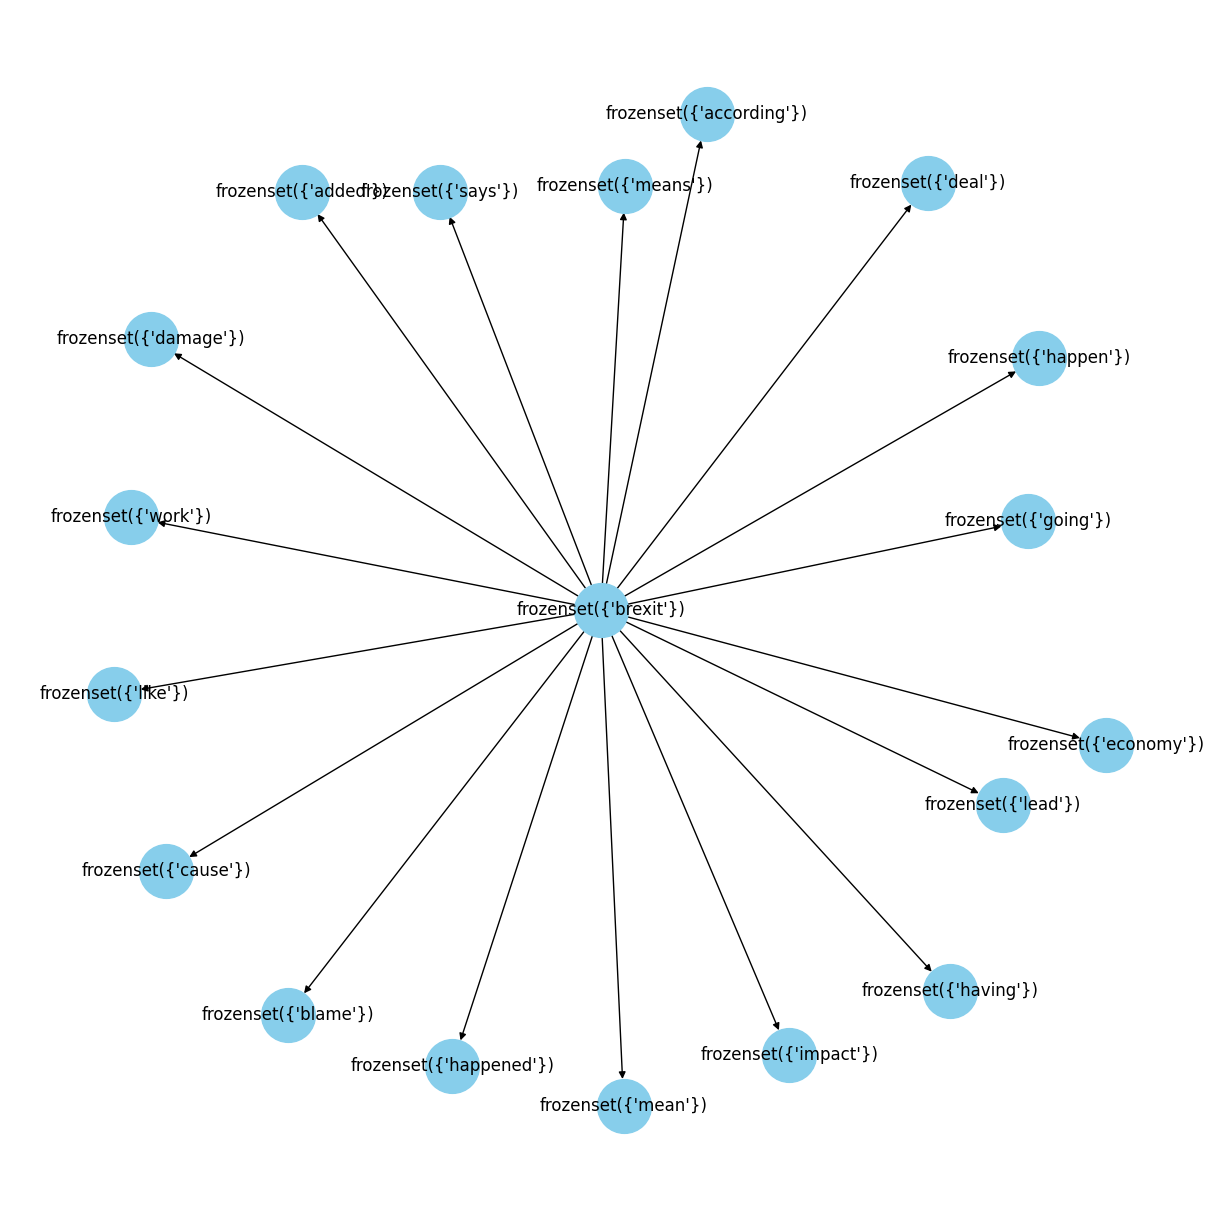

In [ ]:
kg_df = rules[['antecedents',	'consequents', 'confidence']]

GG=nx.from_pandas_edgelist(kg_df, "antecedents", "consequents",
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(GG, k = 0.5) # k regulates the distance between nodes
nx.draw(GG, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

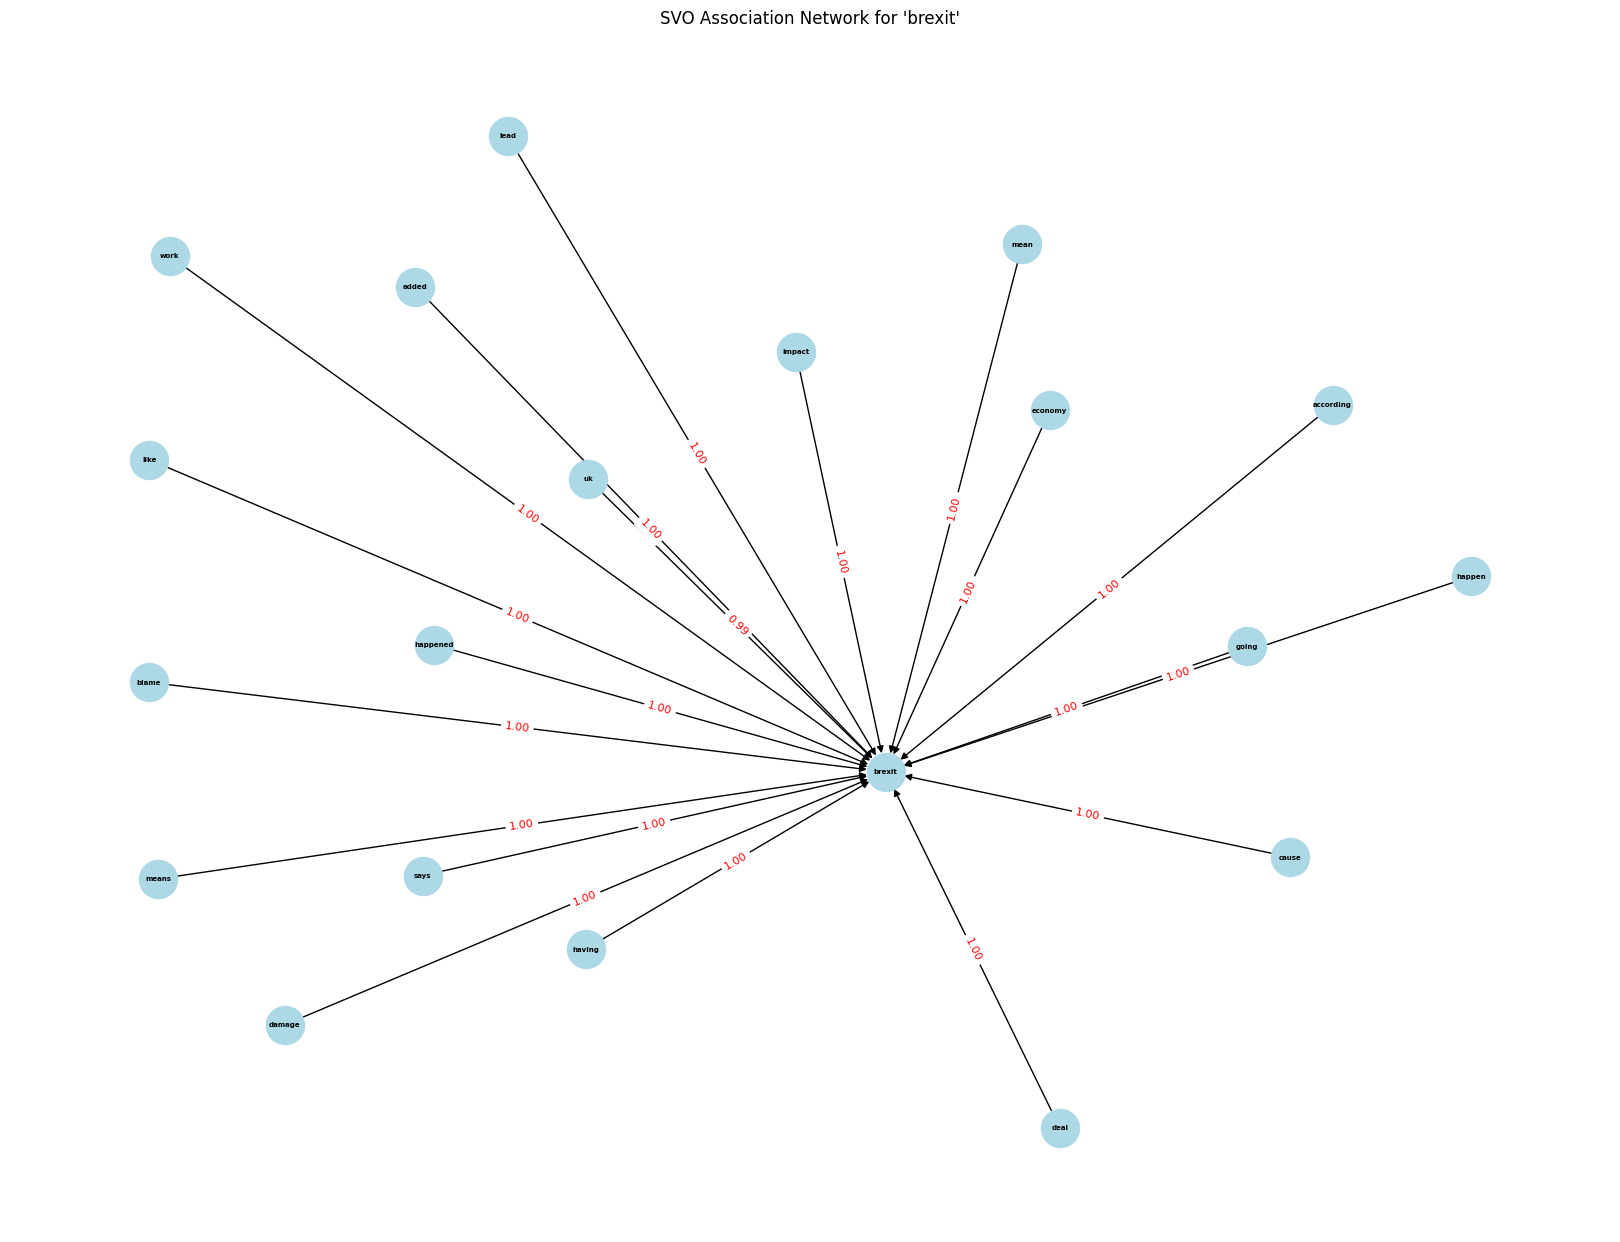

In [ ]:
def plot_network_2(df, central_node):
    # Since 'triple' column already contains the words, we directly use them
    transactions = df['triple'].tolist()

    # Use TransactionEncoder to transform the transactions into a format suitable for FP-Growth
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

    # Apply FP-Growth algorithm
    frequent_itemsets = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)

    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
    """
    # Filter the rules to get associations involving the central node
    filtered_rules = rules[(rules['antecedents'].apply(lambda x: central_node in x) |
                            rules['consequents'].apply(lambda x: central_node in x))]
    """
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes and edges from filtered association rules
    for _, row in rules.iterrows():
        if central_node in row['antecedents']:
            for consequent in row['consequents']:
                G.add_edge(central_node, consequent, weight=row['confidence'])
        elif central_node in row['consequents']:
            for antecedent in row['antecedents']:
                G.add_edge(antecedent, central_node, weight=row['confidence'])

    # Plot the graph
    plt.figure(figsize=(16, 12))
    pos = nx.spring_layout(G)
    edges = G.edges(data=True)
    weights = [edge[2]['weight'] * 1 for edge in edges]

    nx.draw(G, pos, with_labels=True, node_size=750, node_color="lightblue", font_size=5, font_weight="bold", width=weights)

    # Draw edge labels (confidence levels)
    edge_labels = {(edge[0], edge[1]): f"{edge[2]['weight']:.2f}" for edge in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)

    plt.title(f"SVO Association Network for '{central_node}'")
    return plt

# Example usage:
# Assuming df is your DataFrame and 'brexit' is the central node you're interested in
plot_network_2(filtered_df, 'brexit')

In [ ]:
def convert_to_lowercase(triples):
    return [(subj.lower(), verb.lower(), obj.lower()) for subj, verb, obj in triples]

def plot_network(df, central_node):

    # Flatten the SVO triples into transactions
    transactions = []
    for article in df['svo']:
        transaction = []
        for subj, verb, obj in article:
            if subj:
                transaction.append(subj)
            if verb:
                transaction.append(verb)
            if obj:
                transaction.append(obj)
        transactions.append(transaction)

    # Use TransactionEncoder to transform the transactions into a format suitable for FP-Growth
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df = pd.DataFrame(te_ary, columns=te.columns_)

    # Apply FP-Growth algorithm
    frequent_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True)

    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

    # Input the central node
    central_node = central_node  # Change this to the desired central node

    # Filter the rules to get associations involving the central node
    filtered_rules = rules[(rules['antecedents'].apply(lambda x: central_node in x) |
                            rules['consequents'].apply(lambda x: central_node in x))]

    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes and edges from filtered association rules
    for _, row in filtered_rules.iterrows():
        if central_node in row['antecedents']:
            for consequent in row['consequents']:
                G.add_edge(central_node, consequent, weight=row['confidence'])
        elif central_node in row['consequents']:
            for antecedent in row['antecedents']:
                G.add_edge(antecedent, central_node, weight=row['confidence'])

    # Plot the graph
    plt.figure(figsize=(16, 12))
    pos = nx.spring_layout(G)
    edges = G.edges(data=True)
    weights = [edge[2]['weight'] * 1 for edge in edges]

    nx.draw(G, pos, with_labels=True, node_size=750, node_color="lightblue", font_size=5, font_weight="bold", width=weights)

    # Draw edge labels (confidence levels)
    edge_labels = {(edge[0], edge[1]): f"{edge[2]['weight']:.2f}" for edge in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)

    plt.title(f"SVO Association Network for '{central_node}'")
    return plt

def filter_by_date(df, start_date, end_date):
    filtered_df = df[(df['webPublicationDate'] >= start_date) & (df['webPublicationDate'] <= end_date)]
    return filtered_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1]:
import pandas as pd
from collections import Counter

def analyze_svo_triplets(df, word=None):
    # Flatten the list of tuples
    all_triplets = [triplet for sublist in df['svo'] for triplet in sublist]

    # Count the total number of triplets
    total_triplets = len(all_triplets)

    # Count the unique triplets
    unique_triplets = len(set(all_triplets))

    # Separate subjects, verbs, and objects
    subjects = [triplet[0] for triplet in all_triplets]
    verbs = [triplet[1] for triplet in all_triplets]
    objects = [triplet[2] for triplet in all_triplets]

    # Count total and unique subjects, verbs, and objects
    total_subjects = len(subjects)
    total_verbs = len(verbs)
    total_objects = len(objects)

    unique_subjects = len(set(subjects))
    unique_verbs = len(set(verbs))
    unique_objects = len(set(objects))

    # Count the number of triplets where the specific word appears
    if word:
        word_count = sum(1 for triplet in all_triplets if word in triplet)
    else:
        word_count = None

    # Return results as a dictionary
    return {
        'Total Triplets': total_triplets,
        'Unique Triplets': unique_triplets,
        'Total Subjects': total_subjects,
        'Total Verbs': total_verbs,
        'Total Objects': total_objects,
        'Unique Subjects': unique_subjects,
        'Unique Verbs': unique_verbs,
        'Unique Objects': unique_objects,
        'Word Count': word_count
    }

# Example usage:
# Assuming df is your DataFrame with a column 'svo' containing the SVO triplets
#results = analyze_svo_triplets(df, word='shares')
#print(results)

In [ ]:
def filter_triplets_by_word(df, word):
    # Define a function to check if a word is in any part of the triplet
    def contains_word(triplet_list):
        return any(word in triplet for triplet in triplet_list)

    # Apply the function to filter the DataFrame
    filtered_df = df[df['svo'].apply(contains_word)]

    return filtered_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
filtered_df = filter_triplets_by_word(dfb, 'brexit')
filtered_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sectionName,webPublicationDate,svo
27,Opinion,2022-01-30 08:05:15+00:00,"[(uk stock market, performing worst, ), (brexi..."
149,Business,2022-01-23 07:00:15+00:00,"[(relations man, turned persuaded way, chairma..."
389,Business,2022-01-10 11:40:25+00:00,"[(royces rolls covid-19, spurred, royces wealt..."
491,Politics,2022-01-03 18:30:07+00:00,"[(, thwarted, impulse), (eurosceptics, require..."
500,UK news,2022-01-02 17:40:47+00:00,"[(brexit lord boris frost minister johnson, ri..."
...,...,...,...
317487,Business,2022-02-15 18:48:10+00:00,"[(growth pay, continued pay lag, fall growth )..."
317587,Business,2022-02-09 17:54:32+00:00,"[(, wrap, time), (governor, invited work, ), (..."
317596,World news,2022-02-09 11:42:55+00:00,"[(imports, fell damaging, british trading rela..."
317694,Business,2022-02-03 17:09:58+00:00,"[(ivo hradilik, expecting loaded drive, ), (ou..."


In [2]:
def count_words(df, word):
    # Flatten the list of tuples
    all_triplets = [triplet for sublist in df['svo'] for triplet in sublist]
    if word:
        word_count = sum(1 for triplet in all_triplets if word in triplet)
    else:
        word_count = None

    # Return results as a dictionary
    return {
        'Word Count': word_count
    }

#results = count_words(df, word='brexit')
#print(results)

# Testing

In [ ]:
df1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sectionName,webPublicationDate,svo
37621,Business,2016-06-22 22:59:09+00:00,"[(housing prices, cause fall, ), (latest sydne..."
37622,Politics,2016-06-22 18:41:57+00:00,"[(nobel economics laureates, believe, ), (, re..."
37623,Business,2016-06-22 18:34:16+00:00,"[(matthias chief vw müller executive, says, ),..."
37624,Music,2016-06-22 18:19:36+00:00,"[(ticketmaster, unveiled quietly dispensing, t..."
37625,Politics,2016-06-22 18:01:36+00:00,"[(city, remains confident, ), (opinion uk lond..."


In [ ]:
def transaction_analyser(df):
  transactions = df['triple'].tolist()

  # Use TransactionEncoder to transform the transactions into a format suitable for FP-Growth
  te = TransactionEncoder()
  te_ary = te.fit(transactions).transform(transactions)
  df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

  # Apply FP-Growth algorithm
  frequent_itemsets = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)

  return frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
transactions = filtered_df_1['triple'].tolist()

# Use TransactionEncoder to transform the transactions into a format suitable for FP-Growth
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply FP-Growth algorithm
frequent_itemsets = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)
"""
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Filter the rules to get associations involving the central node
filtered_rules = rules[(rules['antecedents'].apply(lambda x: central_node in x) |
                      rules['consequents'].apply(lambda x: central_node in x))]
"""
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(means),(brexit),0.014085,1.000000,0.014085,1.0,1.00,0.000000,inf,0.0
1,(similar),(brexit),0.011268,1.000000,0.011268,1.0,1.00,0.000000,inf,0.0
2,(look),(similar),0.011268,0.011268,0.011268,1.0,88.75,0.011141,inf,1.0
3,(similar),(look),0.011268,0.011268,0.011268,1.0,88.75,0.011141,inf,1.0
4,(look),(brexit),0.011268,1.000000,0.011268,1.0,1.00,0.000000,inf,0.0
...,...,...,...,...,...,...,...,...,...,...
258,(tariffs),"(mean, hefty, brexit, paying)",0.011268,0.011268,0.011268,1.0,88.75,0.011141,inf,1.0
259,(paying),"(mean, hefty, brexit, tariffs)",0.011268,0.011268,0.011268,1.0,88.75,0.011141,inf,1.0
260,(lot),(brexit),0.011268,1.000000,0.011268,1.0,1.00,0.000000,inf,0.0
261,(increase),(brexit),0.014085,1.000000,0.014085,1.0,1.00,0.000000,inf,0.0


In [ ]:
transactions = filtered_df_1['triple'].tolist()

# Use TransactionEncoder to transform the transactions into a format suitable for FP-Growth
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply FP-Growth algorithm
frequent_itemsets = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Filter the rules to get associations involving the central node
filtered_rules = rules[(rules['antecedents'].apply(lambda x: central_node in x) |
                      rules['consequents'].apply(lambda x: central_node in x))]

filtered_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(means),(brexit),0.014085,1.000000,0.014085,1.0,1.00,0.000000,inf,0.0
1,(similar),(brexit),0.011268,1.000000,0.011268,1.0,1.00,0.000000,inf,0.0
4,(look),(brexit),0.011268,1.000000,0.011268,1.0,1.00,0.000000,inf,0.0
5,"(brexit, look)",(similar),0.011268,0.011268,0.011268,1.0,88.75,0.011141,inf,1.0
6,"(brexit, similar)",(look),0.011268,0.011268,0.011268,1.0,88.75,0.011141,inf,1.0
...,...,...,...,...,...,...,...,...,...,...
258,(tariffs),"(mean, hefty, brexit, paying)",0.011268,0.011268,0.011268,1.0,88.75,0.011141,inf,1.0
259,(paying),"(mean, hefty, brexit, tariffs)",0.011268,0.011268,0.011268,1.0,88.75,0.011141,inf,1.0
260,(lot),(brexit),0.011268,1.000000,0.011268,1.0,1.00,0.000000,inf,0.0
261,(increase),(brexit),0.014085,1.000000,0.014085,1.0,1.00,0.000000,inf,0.0


# Plot Network 2

In [ ]:
from sys import platlibdir
def plot(df, central_node, min_support=0.01, i=12, j=10, name="plot.png", return_rules=False):

  transactions = df['triple'].tolist()

  te = TransactionEncoder()
  te_ary = te.fit(transactions).transform(transactions)
  df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

  frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

  rules = association_rules(frequent_itemsets, metric="zhangs_metric", min_threshold=0.5)

  # Create a directed graph
  G = nx.DiGraph()

  # Add nodes and edges from filtered association rules
  for _, row in rules.iterrows():
      if central_node in row['antecedents']:
          for consequent in row['consequents']:
              G.add_edge(central_node, consequent, weight=row["support"])
      elif central_node in row['consequents']:
          for antecedent in row['antecedents']:
              G.add_edge(antecedent, central_node, weight=row["support"])


  # Generate a graph layout
  plt.figure(figsize=(i, j))  # Reduced figure size to better fit on a single page

  # Use the spring layout for better node spacing
  pos = nx.spring_layout(G, k=0.5, iterations=50)

  # Calculate node sizes based on degree (or use a centrality measure)
  node_sizes = [500 + 1000 * nx.degree(G, node) for node in G]

  # defining the edges
  edges = G.edges(data=True)

  # Draw nodes with customized sizes and colors
  nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="skyblue", edgecolors='k')

  # Adjust edge thickness based on weights
  weights = [edge[2]['weight'] for edge in G.edges(data=True)]
  nx.draw_networkx_edges(G, pos, edgelist=edges, width=[weight * 100 for weight in weights], alpha=0.6)

  # Draw labels with adjusted font size for readability
  nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold")

  # Draw edge labels (confidence levels)
  edge_labels = {(edge[0], edge[1]): f"{edge[2]['weight']:.4f}" for edge in edges}
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=6)

  # Add title and remove axis
  plt.title(f"SVO Association Network for '{central_node}'", fontsize=14)
  plt.axis('off')
  plt.savefig(name)

  # Display the graph
  if return_rules:
    return plt, rules, frequent_itemsets, edges
  else:
    return plt
chart, rules, freq_itemsets, edges = plot( filtered_df, "brexit", return_rules=True, min_support=0.01)
chart

In [ ]:
central_node = 'brexit'

# Date 1
start_date_1 = '2015-06-23'
end_date_1 = '2016-06-23'
df1 = filter_by_date(df, start_date_1, end_date_1)

# Date 2
start_date_2 = '2016-06-24'
end_date_2 = '2017-03-29'
df2 = filter_by_date(df, start_date_2, end_date_2)

# Date 3
start_date_3 = '2017-03-30'
end_date_3 = '2019-01-15'
df3 = filter_by_date(df, start_date_3, end_date_3)

# Date 4
start_date_4 = '2019-01-16'
end_date_4 = '2019-07-24'
df4 = filter_by_date(df, start_date_4, end_date_4)

# Date 5
start_date_5 = '2019-07-25'
end_date_5 = '2020-01-31'
df5 = filter_by_date(df, start_date_5, end_date_5)

# Date 6
start_date_6 = '2020-02-01'
end_date_6 = '2020-12-31'
df6 = filter_by_date(df, start_date_6, end_date_6)

# Date 7
start_date_7 = '2021-01-01'
end_date_7 = '2022-01-01'
df7 = filter_by_date(df, start_date_7, end_date_7)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

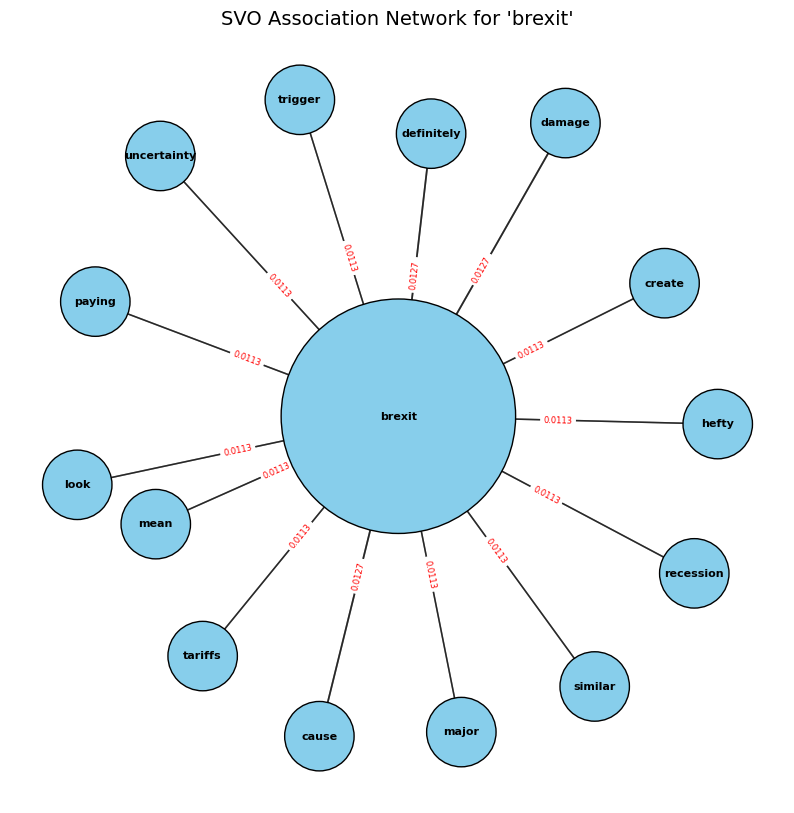

In [ ]:
all_triplets_1 = [triplet for sublist in df1['svo'] for triplet in sublist]
filtered_df_1 = filtered_df_creator(all_triplets_1, 'brexit')
#chart, rules, freq_itemsets, edges = plot( filtered_df, "brexit", return_rules=True, min_support=0.01)

plot(filtered_df_1, central_node, min_support=0.01, i=10, j=10, name="1st.png")

In [ ]:
print(transaction_analyser(filtered_df_1))

      support                                itemsets
0    1.000000                                (brexit)
1    0.014085                                 (means)
2    0.011268                               (similar)
3    0.011268                                  (look)
4    0.016901                                  (hurt)
..        ...                                     ...
126  0.011268         (mean, paying, brexit, tariffs)
127  0.011268  (hefty, tariffs, mean, paying, brexit)
128  0.011268                           (lot, brexit)
129  0.014085                      (brexit, increase)
130  0.011268                        (people, brexit)

[131 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


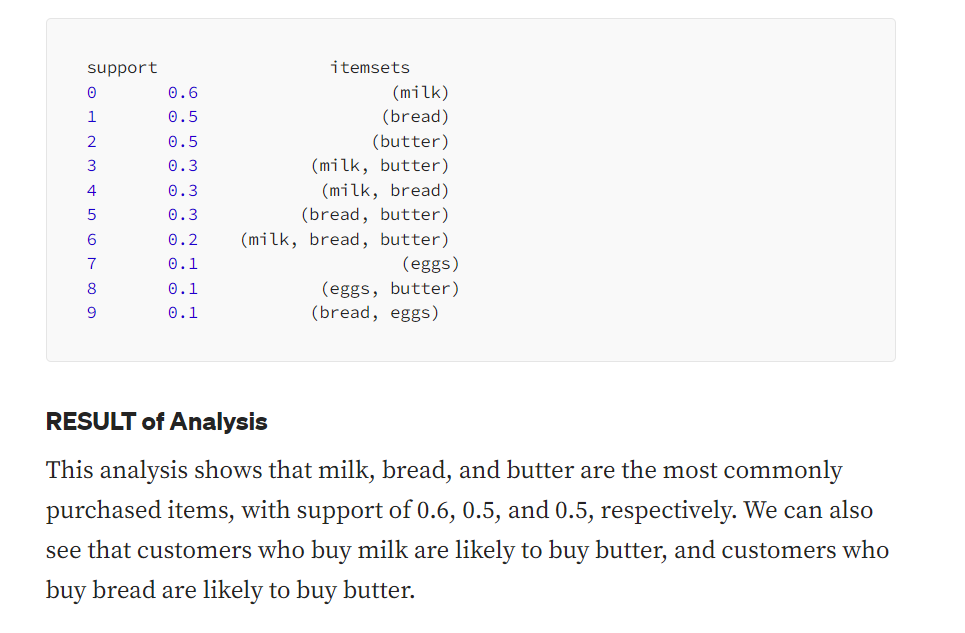

In [ ]:
all_triplets_2 = [triplet for sublist in df2['svo'] for triplet in sublist]
filtered_df_2 = filtered_df_creator(all_triplets_2, 'brexit')
plot(filtered_df_2, central_node, min_support=0.001, name="2nd.png")
#min_support=0.02, i=10, j=10,name="1st.png"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

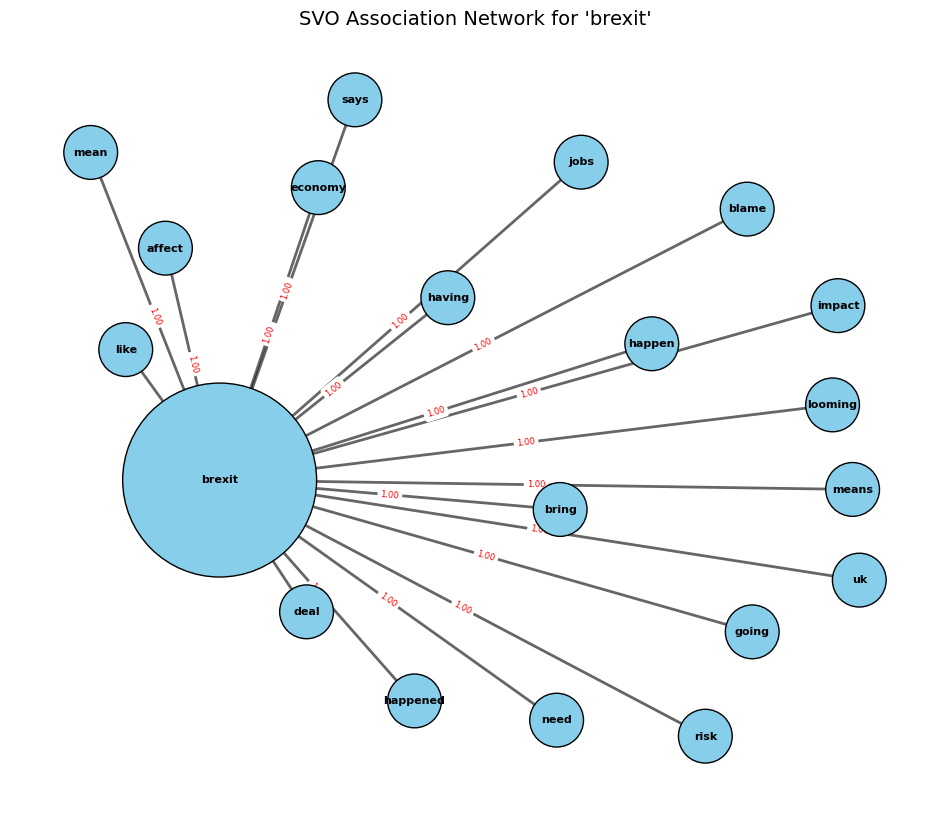

In [ ]:
all_triplets_3 = [triplet for sublist in df3['svo'] for triplet in sublist]
filtered_df_3 = filtered_df_creator(all_triplets_3, 'brexit')
plot(filtered_df_3, central_node, min_support=0.012, name="3rd.png")
#min_support=0.02, i=10, j=10,name="1st.png"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

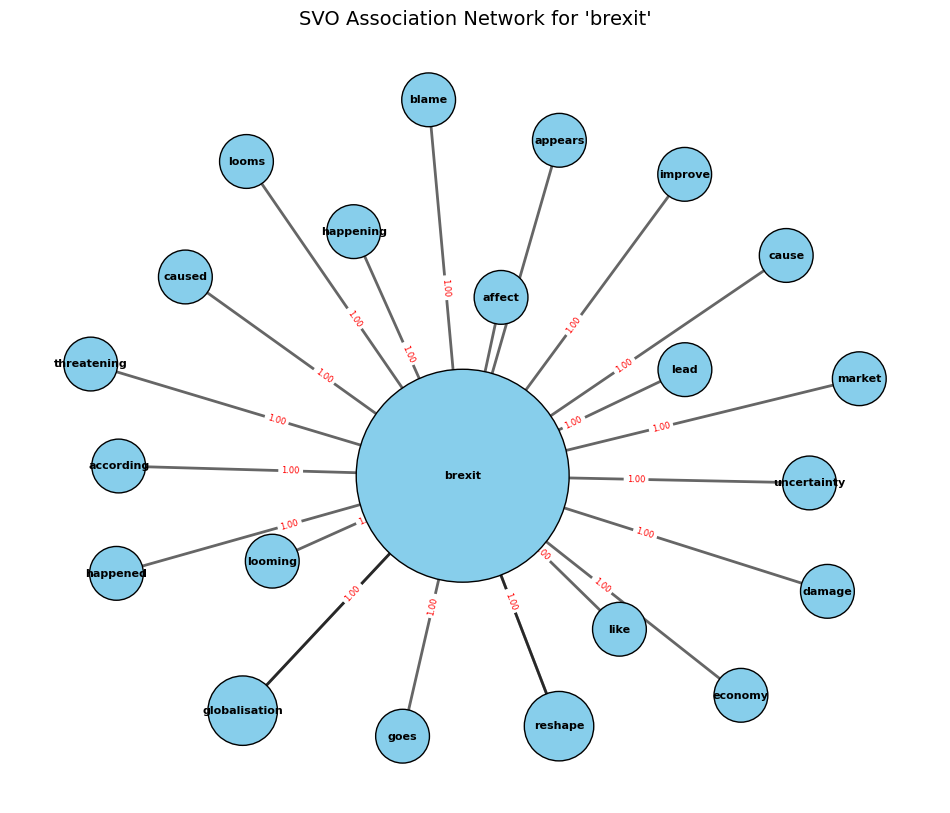

In [ ]:
all_triplets_4 = [triplet for sublist in df4['svo'] for triplet in sublist]
filtered_df_4 = filtered_df_creator(all_triplets_4, 'brexit')
#plot_network_2(filtered_df_4, central_node)
plot(filtered_df_4, central_node, name="4th.png", min_support=0.014)
#min_support=0.02, i=10, j=10,name="1st.png"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

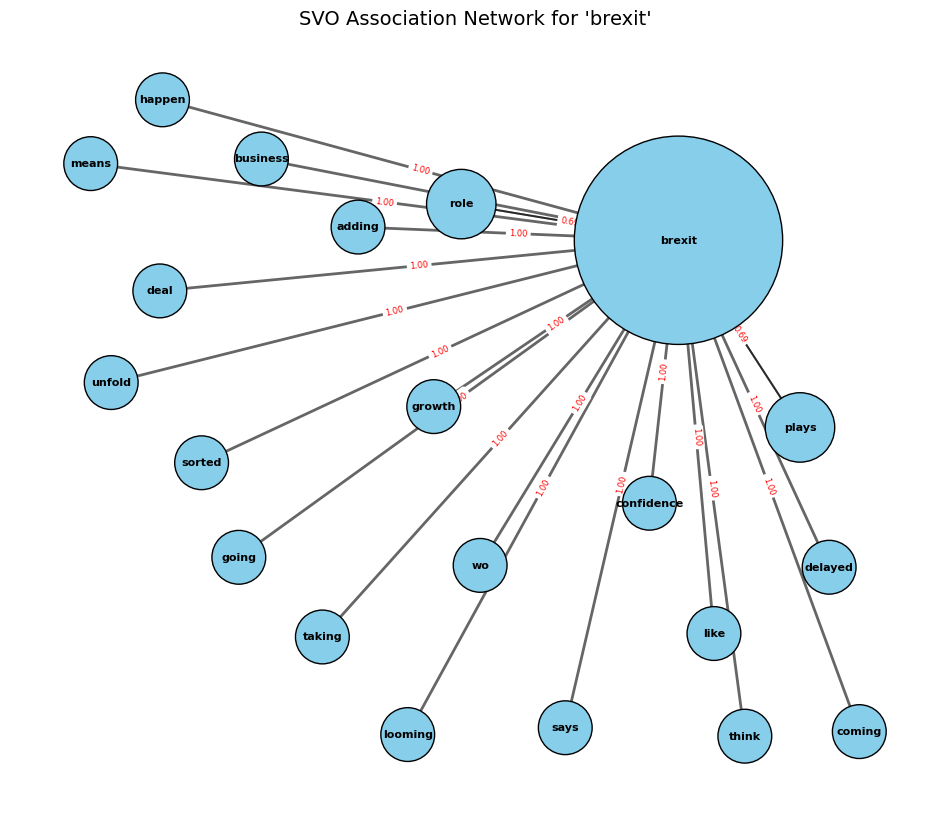

In [ ]:
all_triplets_5 = [triplet for sublist in df5['svo'] for triplet in sublist]
filtered_df_5 = filtered_df_creator(all_triplets_5, 'brexit')
plot(filtered_df_5, central_node, name="5th.png", min_support=0.013)
#min_support=0.02, i=10, j=10,name="1st.png"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

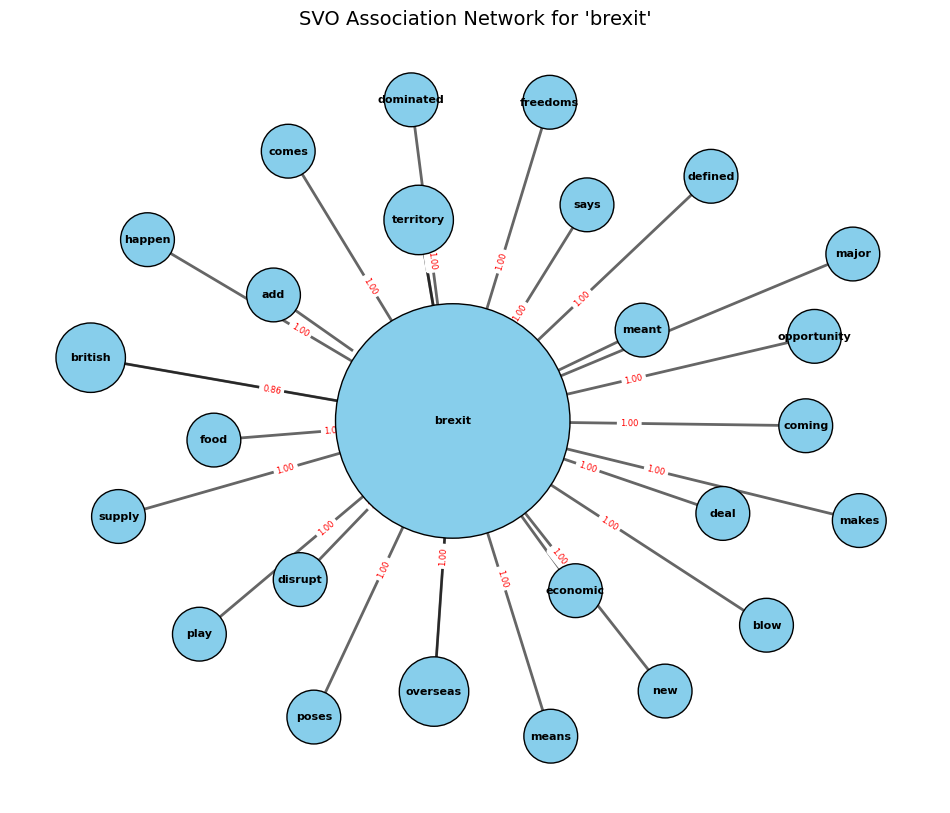

In [ ]:
all_triplets_6 = [triplet for sublist in df6['svo'] for triplet in sublist]
filtered_df_6 = filtered_df_creator(all_triplets_6, 'brexit')
plot(filtered_df_6, central_node, name="6th.png", min_support=0.015)
#min_support=0.02, i=10, j=10,name="1st.png"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

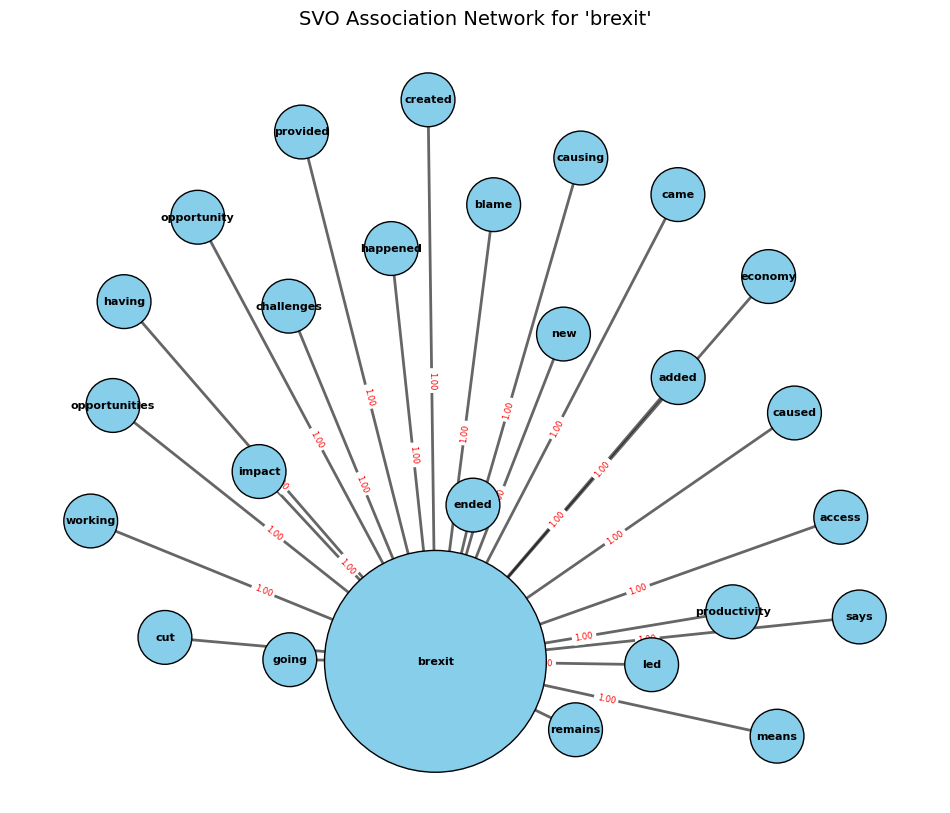

In [ ]:
all_triplets_7 = [triplet for sublist in df7['svo'] for triplet in sublist]
filtered_df_7 = filtered_df_creator(all_triplets_7, 'brexit')
plot(filtered_df_7, central_node, name="7th.png", min_support=0.013)
#min_support=0.02, i=10, j=10,name="1st.png"

In [ ]:
print(f"""df1 shape: {df1.shape},
          all_triplets_1 lenght: {len(all_triplets_1)},
          filtered_df_1 shape: {filtered_df_1.shape}""")

print(f"""df2 shape: {df2.shape},
          all_triplets_2 lenght: {len(all_triplets_2)},
          filtered_df_2 shape: {filtered_df_2.shape}""")

print(f"""df3 shape: {df3.shape},
          all_triplets_3 lenght: {len(all_triplets_3)},
          filtered_df_3 shape: {filtered_df_3.shape}""")

print(f"""df4 shape: {df4.shape},
          all_triplets_4 lenght: {len(all_triplets_4)},
          filtered_df_4 shape: {filtered_df_4.shape}""")

print(f"""df5 shape: {df5.shape},
          all_triplets_5 lenght: {len(all_triplets_5)},
          filtered_df_5 shape: {filtered_df_5.shape}""")

print(f"""df6 shape: {df6.shape},
          all_triplets_6 lenght: {len(all_triplets_6)},
          filtered_df_6 shape: {filtered_df_6.shape}""")

print(f"""df7 shape: {df7.shape},
          all_triplets_7 lenght: {len(all_triplets_7)},
          filtered_df_7 shape: {filtered_df_7.shape}""")

df1 shape: (103461, 3),
          all_triplets_1 lenght: 4812703,
          filtered_df_1 shape: (710, 2)
df2 shape: (59613, 3),
          all_triplets_2 lenght: 3019833,
          filtered_df_2 shape: (1675, 2)
df3 shape: (83251, 3),
          all_triplets_3 lenght: 4211129,
          filtered_df_3 shape: (2194, 2)
df4 shape: (19824, 3),
          all_triplets_4 lenght: 987070,
          filtered_df_4 shape: (826, 2)
df5 shape: (29489, 3),
          all_triplets_5 lenght: 1509170,
          filtered_df_5 shape: (669, 2)
df6 shape: (57254, 3),
          all_triplets_6 lenght: 3578605,
          filtered_df_6 shape: (371, 2)
df7 shape: (57250, 3),
          all_triplets_7 lenght: 3336604,
          filtered_df_7 shape: (649, 2)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sectionName,webPublicationDate,svo
37621,Business,2016-06-22 22:59:09+00:00,"[(housing prices, cause fall, ), (latest sydne..."
37622,Politics,2016-06-22 18:41:57+00:00,"[(nobel economics laureates, believe, ), (, re..."
37623,Business,2016-06-22 18:34:16+00:00,"[(matthias chief vw müller executive, says, ),..."
37624,Music,2016-06-22 18:19:36+00:00,"[(ticketmaster, unveiled quietly dispensing, t..."
37625,Politics,2016-06-22 18:01:36+00:00,"[(city, remains confident, ), (opinion uk lond..."


In [ ]:
filtered_df_6.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,row_number,triple
0,491,"[brexit, weighed, yea]"
1,619,"[brexit, comes]"
2,1918,"[brexit, plays, leave, culturally, sort, voters]"
3,2315,"[brexit, allow, key]"
4,2408,"[brexit, avoided, lead]"


# Old

## Data Preparation

In [ ]:
import pandas as pd
import ast

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bath/Dissertation/The Guardian Datasets/business_svo.csv')
df['svo test'] = df['svo'].apply(ast.literal_eval)

# convert all triples to lower case!!
# check the word occurences in the triple.


## FP Growth

In [ ]:
# Flatten the SVO triples into transactions
transactions = []
for article in df['svo test']:
    transaction = []
    for subj, verb, obj in article:
        if subj:
            transaction.append(subj)
        if verb:
            transaction.append(verb)
        if obj:
            transaction.append(obj)
    transactions.append(transaction)

# Use TransactionEncoder to transform the transactions into a format suitable for FP-Growth
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply FP-Growth algorithm
frequent_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

## Graph

In [4]:
"""
# Input the central node
central_node = 'government'  # Change this to the desired central node

# Filter the rules to get associations involving the central node
filtered_rules = rules[(rules['antecedents'].apply(lambda x: central_node in x) |
                        rules['consequents'].apply(lambda x: central_node in x))]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges from filtered association rules
for _, row in filtered_rules.iterrows():
    if central_node in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(central_node, consequent, weight=row['confidence'])
    elif central_node in row['consequents']:
        for antecedent in row['antecedents']:
            G.add_edge(antecedent, central_node, weight=row['confidence'])

# Plot the graph
plt.figure(figsize=(16, 12))
pos = nx.spring_layout(G)
edges = G.edges(data=True)
weights = [edge[2]['weight'] * 1 for edge in edges]

nx.draw(G, pos, with_labels=True, node_size=750, node_color="lightblue", font_size=5, font_weight="bold", width=weights)

# Draw edge labels (confidence levels)
edge_labels = {(edge[0], edge[1]): f"{edge[2]['weight']:.2f}" for edge in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)

plt.title(f"SVO Association Network for '{central_node}'")
plt.show()
"""

'\n# Input the central node\ncentral_node = \'government\'  # Change this to the desired central node\n\n# Filter the rules to get associations involving the central node\nfiltered_rules = rules[(rules[\'antecedents\'].apply(lambda x: central_node in x) |\n                        rules[\'consequents\'].apply(lambda x: central_node in x))]\n\n# Create a directed graph\nG = nx.DiGraph()\n\n# Add nodes and edges from filtered association rules\nfor _, row in filtered_rules.iterrows():\n    if central_node in row[\'antecedents\']:\n        for consequent in row[\'consequents\']:\n            G.add_edge(central_node, consequent, weight=row[\'confidence\'])\n    elif central_node in row[\'consequents\']:\n        for antecedent in row[\'antecedents\']:\n            G.add_edge(antecedent, central_node, weight=row[\'confidence\'])\n\n# Plot the graph\nplt.figure(figsize=(16, 12))\npos = nx.spring_layout(G)\nedges = G.edges(data=True)\nweights = [edge[2][\'weight\'] * 1 for edge in edges]\n\nnx